In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
sal=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# EDA

In [3]:
 sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
sal.nunique().to_frame("Unique Values")

,Unique Values
rank,3
discipline,2
yrs.since.phd,53
yrs.service,52
sex,2
salary,371


In [8]:
object_datatype=[]
for x in sal.dtypes.index:
     if sal.dtypes[x]=='O':
        object_datatype.append(x)
int_datatype=[]
for x in sal.dtypes.index:
    if sal.dtypes[x]=='int64':
        int_datatype.append(x)

In [9]:
#le=LabelEncoder()

In [10]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
list1 = ['rank','discipline','sex']

for i in list1:
    sal[i] = le.fit_transform(sal[i].values.reshape(-1,1))
    
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


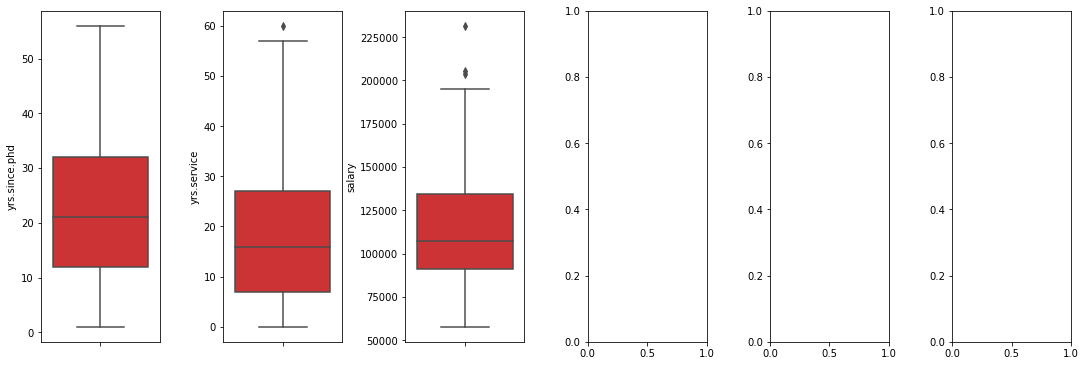

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in sal[int_datatype].items():
    sns.boxplot(y=col, data=sal, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

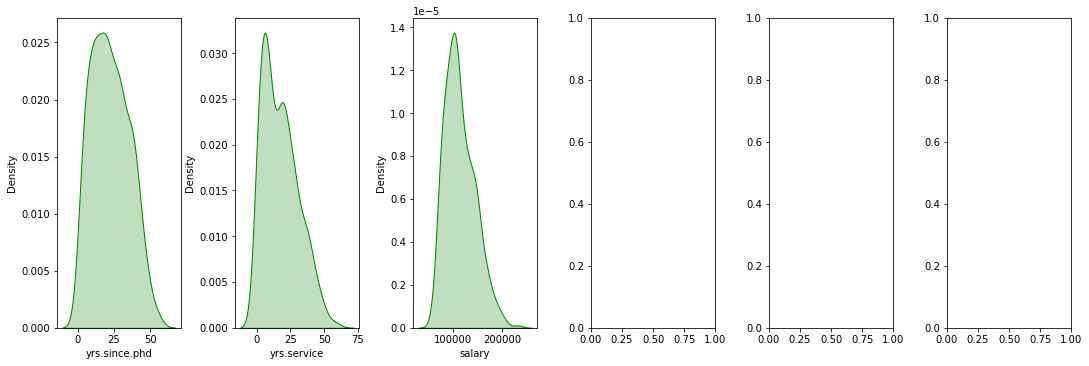

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in sal[int_datatype].items():
    sns.distplot(value,ax=ax[index], hist=False, color="g", kde_kws={'shade':True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


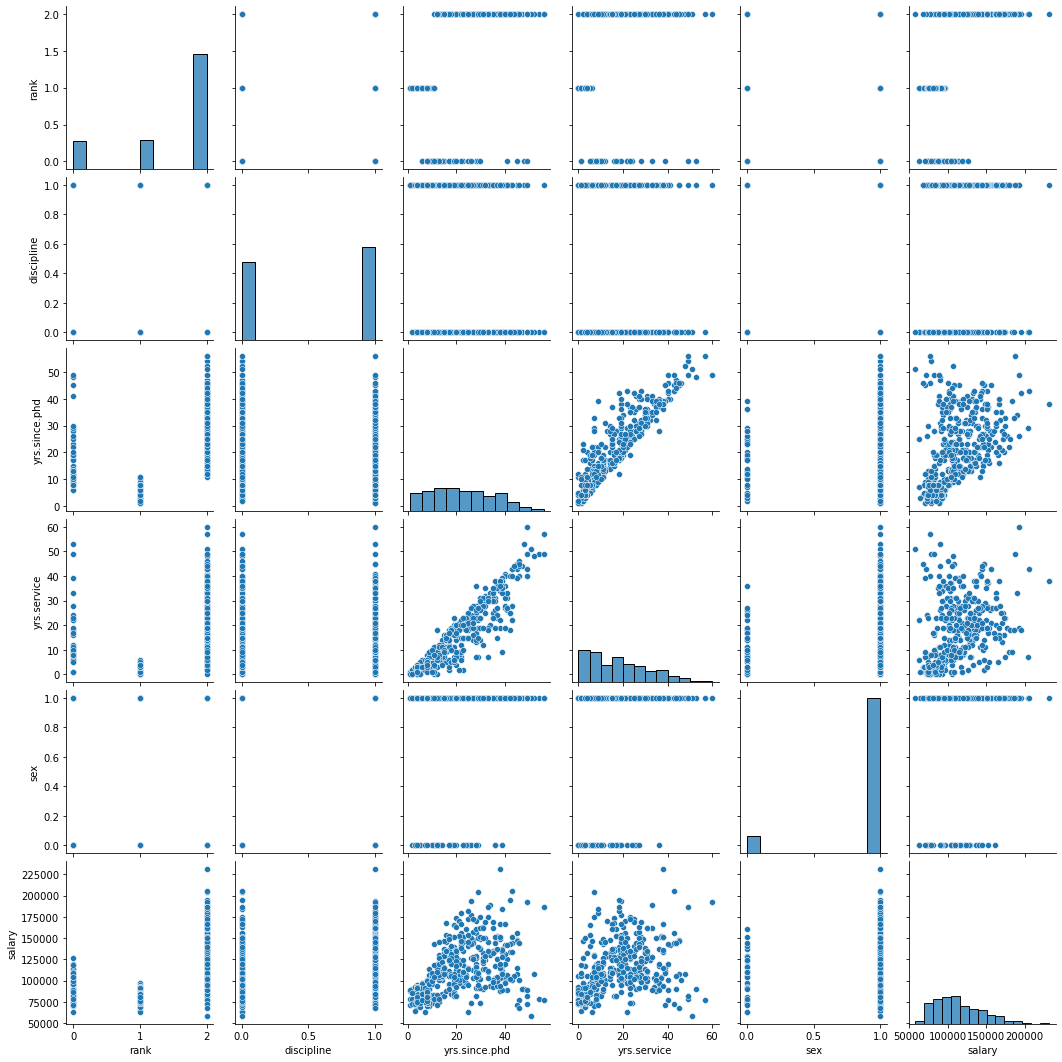

In [13]:
sns.pairplot(sal)

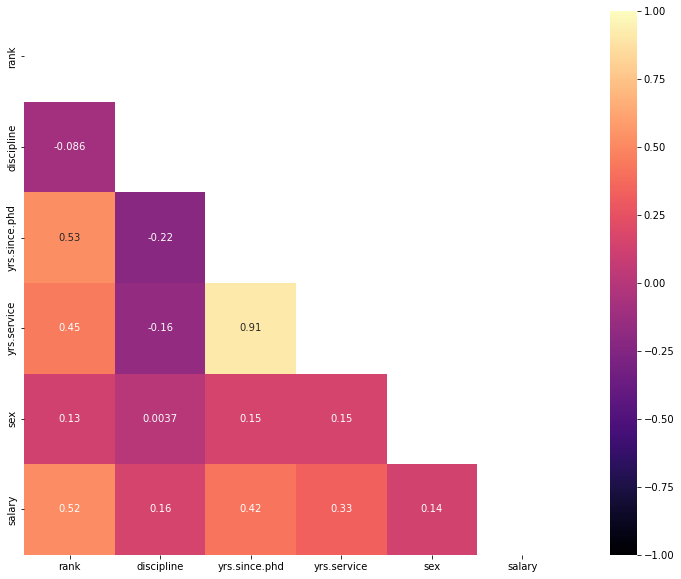

In [14]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(sal.corr())
figure=plt.figure(figsize=(15,10))
sns.heatmap(sal.corr(),vmin=-1,vmax=1,annot=True, square=True, cmap='magma', annot_kws={'size':10},mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# Remove Outliers

In [17]:
sal_out=pd.DataFrame({})
sal_out["yrs.since.phd"]=sal["yrs.since.phd"]
sal_out["yrs.service"]=sal["yrs.service"]
sal_out["salary"]=sal["salary"]

In [18]:
z=np.abs(zscore(sal_out))
print(np.where(z>3))#returns index location of ouliers

(array([ 43, 131, 330, 364], dtype=int64), array([2, 1, 1, 2], dtype=int64))


In [19]:
z.iloc[364]

yrs.since.phd    1.607142
yrs.service      1.954281
salary           3.034410
Name: 364, dtype: float64

In [20]:
threashold=3
sal1=sal_out[(z<3).all(axis=1)]
sal1.shape

(393, 3)

In [21]:
sal1=sal.drop([43,131,330,364], axis=0)


In [22]:
sal1

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [23]:
loss=(sal.shape[0]-sal1.shape[0])/sal.shape[0]*100
loss

1.0075566750629723

# Skewness

In [24]:
sal1.skew()

rank            -1.135734
discipline      -0.179514
yrs.since.phd    0.288531
yrs.service      0.588861
sex             -2.691158
salary           0.581098
dtype: float64

<AxesSubplot:ylabel='Frequency'>

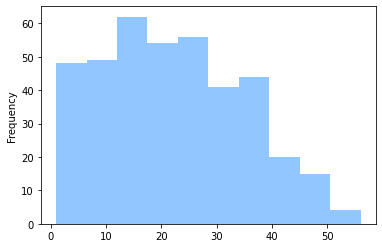

In [25]:
sal1['yrs.since.phd'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

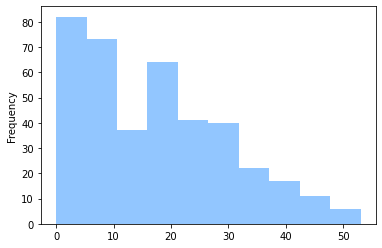

In [26]:
sal1['yrs.service'].plot.hist()

In [27]:
from scipy.stats import boxcox
# 0 -> log transformation
# .5 -> Square root trasformation
sal1['yrs.since.phd']=boxcox(sal1['yrs.since.phd'],0)

<AxesSubplot:ylabel='Frequency'>

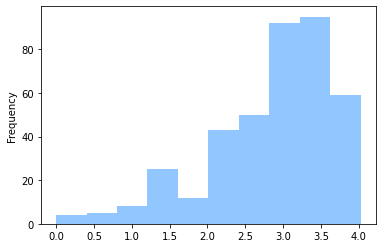

In [28]:
sal1['yrs.since.phd'].plot.hist()

# Splitting the whole dataset into two parts namely X and Y

In [29]:
x=sal1.drop('salary',axis=1)
y=sal1['salary']

In [30]:
x.shape,y.shape

((393, 5), (393,))

# Feature Scaling

In [31]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,0.653958,0.914576,0.111959,0.056278,0.331918
1,0.653958,0.914576,0.176661,-0.102269,0.331918
2,-0.664018,0.914576,-1.853479,-1.132824,0.331918
3,0.653958,0.914576,1.199565,1.721021,0.331918
4,0.653958,0.914576,1.050994,1.879568,0.331918
...,...,...,...,...,...
388,0.653958,-1.093403,0.808337,1.007560,0.331918
389,0.653958,-1.093403,0.729474,0.135552,0.331918
390,0.653958,-1.093403,1.112538,0.611193,0.331918
391,0.653958,-1.093403,0.458133,-0.181542,0.331918


# finding best Random state for building best Classification model

In [32]:
Accu=0


for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lm=LinearRegression()
    lm.fit(X_train, Y_train)
    pred = lm.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>Accu:
        Accu=r2
        

print("Best R2 score is", Accu,"at Random State",i)
print('At random state', i,'lm score is: ', round(lm.score(X_train, Y_train),4))
print('Mean Squared error is: ', mean_squared_error(Y_test,pred)*100)
print('Root Mean Squared error is: ', np.sqrt(mean_squared_error(Y_test,pred))*100)

Best R2 score is 0.5831332875959256 at Random State 999
At random state 999 lm score is:  0.4565
Mean Squared error is:  64409532958.427216
Root Mean Squared error is:  2537903.326733058


# Machine Learning Model for Regression with evaulution matrix

In [46]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=999)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model,X,Y,cv=5).mean())*100
    print('cv score is ', cv)
    
    # Result of r2 score minus cv score
    result = r2 - cv
    print("R2 Score - Cross Validation Score is", result)

In [42]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 25438.722662227683
R2 Score is: 38.172018969244924
cv score is  38.749147914655985
R2 Score - Cross Validation Score is -0.5771289454110615


In [43]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, x, y)

RMSE Score is: 25379.15430145875
R2 Score is: 38.46123784286739
cv score is  38.65772676824659
R2 Score - Cross Validation Score is -0.19648892537919949


In [45]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x,y )

RMSE Score is: 33929.23315170727
R2 Score is: -9.987302794895214
cv score is  -7.684588543795856
R2 Score - Cross Validation Score is -2.302714251099358


In [44]:
#decison tree
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 32169.35819552266
R2 Score is: 1.1266482418053725
cv score is  -25.01786548829621
R2 Score - Cross Validation Score is 26.144513730101583


In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,Y_train)
gb_pred = gb.predict(X_test)
gb.score(X_test,Y_test)


0.4672587432178056

In [55]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor()
regr.fit(X_train,Y_train)
regr_pred = regr.predict(X_test)
regr.score(X_test,Y_test)


0.4343215601256205

# Model Selection

In [33]:
pred=lm.predict(X_test)
a = np.array(Y_test)
sal_com = pd.DataFrame({'Actual Salary': a, 'Predicted Salary':pred}, index = range(len(a)))
sal_com

,Actual Salary,Predicted Salary
0,136500,118641.473681
1,57800,117342.347250
2,166605,129031.330636
3,107500,129703.640420
4,113341,90583.365216
...,...,...
94,146000,125474.924953
95,167284,124189.204290
96,105260,115470.583977
97,88175,114548.939150


Since linear regression is showing better result than other models, so we are saving this model in pickle.

# Model Saving

In [48]:
import pickle
filename='Salary.pkl'
pickle.dump(lm,open(filename,'wb'))